In [25]:
! pip install font_manager

ERROR: Could not find a version that satisfies the requirement font_manager (from versions: none)
ERROR: No matching distribution found for font_manager


In [1]:
font_path = "C:/Windows/Fonts/malgun.ttf"  # 또는 시스템에 설치된 다른 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

NameError: name 'font_manager' is not defined

# 필요 라이브러리 임포트

In [1]:
! pip install missingno

In [3]:
# 기본 라이브러리
import pandas as pd
import numpy as np

# 결측치 확인
import missingno as msno

# 데이터 시각화
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
import matplotlib.gridspec as gridspec

# 피처 엔지니어링
from sklearn.preprocessing import OneHotEncoder
from scipy import sparse

# 모델링
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb


C:\Users\m\AppData\Local\Temp\ipykernel_22324\856595339.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [5]:
df_train = pd.read_csv(r'C:/Users/m/.vscode/날씨빅콘/전처리_train.csv')

In [6]:
df_test = pd.read_csv(r'C:/Users/m/.vscode/날씨빅콘/전처리_test.csv')

In [7]:
def remove_nan(df, nan_value=-99):
    for column in df.columns:
        df = df[df[column] != nan_value]
    return df

train = remove_nan(df_train)
test = remove_nan(df_test)

<Axes: >

C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45336 (\N{HANGUL SYLLABLE NEOM}) missing from current font.
  func(*args, **kwargs)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE

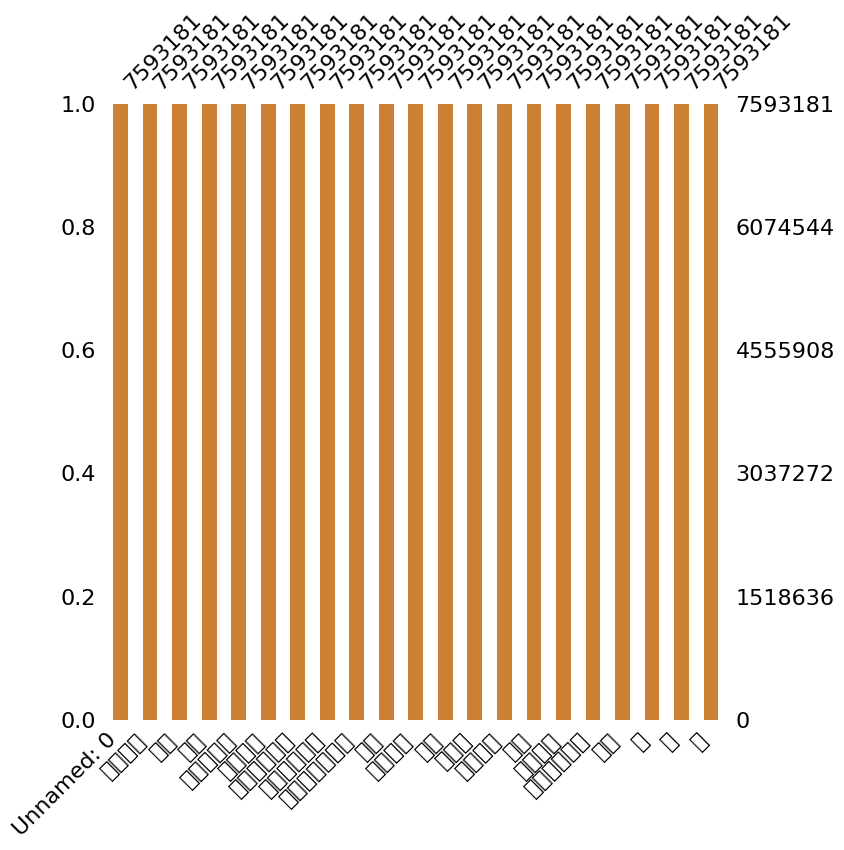

In [7]:
msno.bar(train.iloc[:, 1:29], figsize=(8, 8), color=(0.8, 0.5, 0.2))

In [8]:
# 컬럼 요약 함수
def resumetable(df):
    print(f'데이터셋 모양: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['고유값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if 'bin' in col or col =='target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == 'float64':
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == 'int64':
            summary.loc[col, '데이터 종류'] = '순서형'
    return summary

In [9]:
summary = resumetable(train)
summary

데이터셋 모양: (7593181, 22)


,데이터 타입,고유값 개수,데이터 종류
Unnamed: 0.1,int64,7593181,순서형
Unnamed: 0,int64,7593181,순서형
격자넘버,int64,323,순서형
날짜,object,26304,None
시간,int64,24,순서형
공동주택수,int64,146,순서형
지점번호,int64,185,순서형
계약전력합계,int64,769,순서형
전력수요합계,float64,918786,연속형
전력부하량평균,float64,866,연속형


## 함수정의

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_mean_by_bins(df, independent_var, dependent_var, bins=5):
    """
    주어진 데이터프레임의 특정 독립 변수를 구간으로 나누고 각 구간별 종속 변수의 평균값을 계산하여 시각화하는 함수
    
    Parameters:
    - df: 데이터프레임
    - independent_var: 독립 변수의 이름 (문자열)
    - dependent_var: 종속 변수의 이름 (문자열)
    - bins: 구간의 수 (기본값: 5)
    
    Returns:
    - None
    """
    # 독립 변수를 구간으로 나누기
    df['bins'] = pd.cut(df[independent_var], bins=bins)
    
    # 각 구간별 종속 변수 평균값 계산
    grouped = df.groupby('bins')[dependent_var].mean()
    
    # 결과 출력
    print(grouped)
    
    # 시각화
    grouped.plot(kind='bar')
    plt.xlabel(f'{independent_var} Bins')
    plt.ylabel(f'Mean of {dependent_var}')
    plt.title(f'Mean of {dependent_var} by {independent_var} Bins')
    plt.show()

# 예시 사용법
# plot_mean_by_bins(train, '기온', '전력기상지수', bins=5)


### 기온

bins
(-24.662, -12.3]    101.650432
(-12.3, 0.0]        100.407173
(0.0, 12.3]          97.472484
(12.3, 24.6]         95.135639
(24.6, 36.9]        124.599424
Name: 전력기상지수, dtype: float64


C:\Users\m\AppData\Local\Temp\ipykernel_3760\1823313478.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins')[dependent_var].mean()
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_

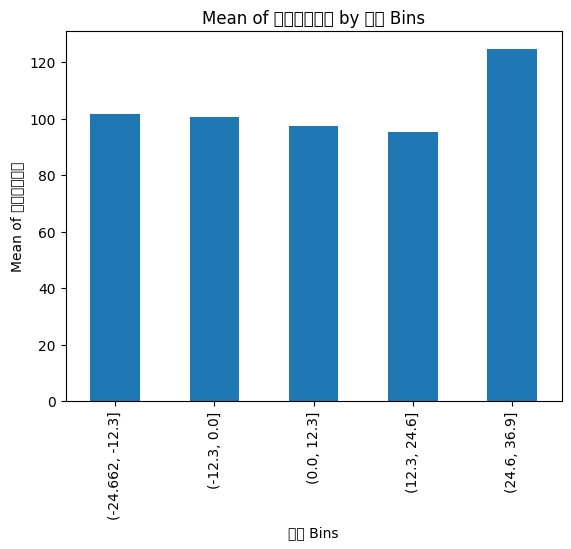

In [21]:
#기온
plot_mean_by_bins(train, '기온', '전력기상지수', bins=5)

### 강수량

bins
(-0.102, 20.44]     99.999786
(20.44, 40.88]      99.529783
(40.88, 61.32]      90.794556
(61.32, 81.76]      95.012391
(81.76, 102.2]     113.825000
Name: 전력기상지수, dtype: float64


C:\Users\m\AppData\Local\Temp\ipykernel_3760\1823313478.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins')[dependent_var].mean()
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_

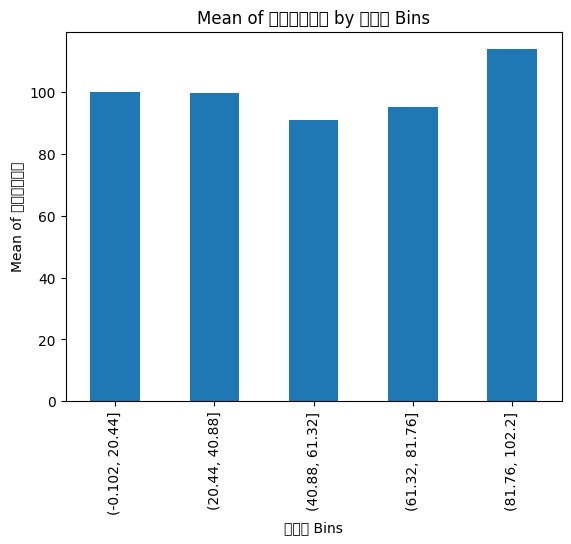

In [18]:
plot_mean_by_bins(train, '강수량', '전력기상지수', bins=5)

### 시간

bins
(-0.023, 4.6]     86.660219
(4.6, 9.2]        84.109948
(9.2, 13.8]       97.506872
(13.8, 18.4]     100.818054
(18.4, 23.0]     130.401972
Name: 전력기상지수, dtype: float64


C:\Users\m\AppData\Local\Temp\ipykernel_3760\1823313478.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins')[dependent_var].mean()
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_

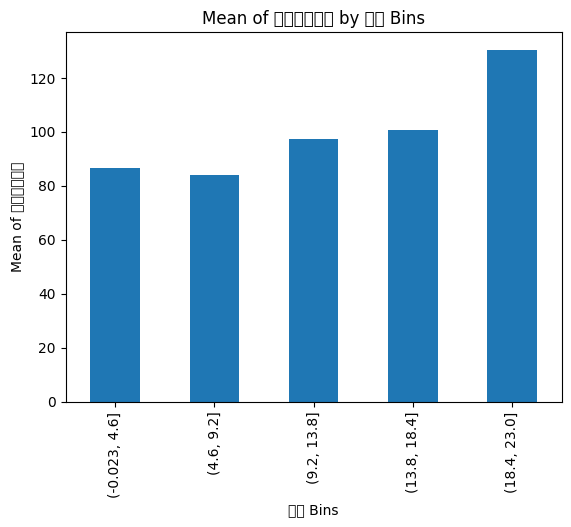

In [42]:
plot_mean_by_bins(train, '시간', '전력기상지수', bins=5)

### 전력수요합계

bins
(261.638, 22452.472]       98.540490
(22452.472, 44532.904]    113.535929
(44532.904, 66613.336]    137.407427
(66613.336, 88693.768]    186.941935
(88693.768, 110774.2]     221.826805
Name: 전력기상지수, dtype: float64


C:\Users\m\AppData\Local\Temp\ipykernel_3760\1823313478.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins')[dependent_var].mean()
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_

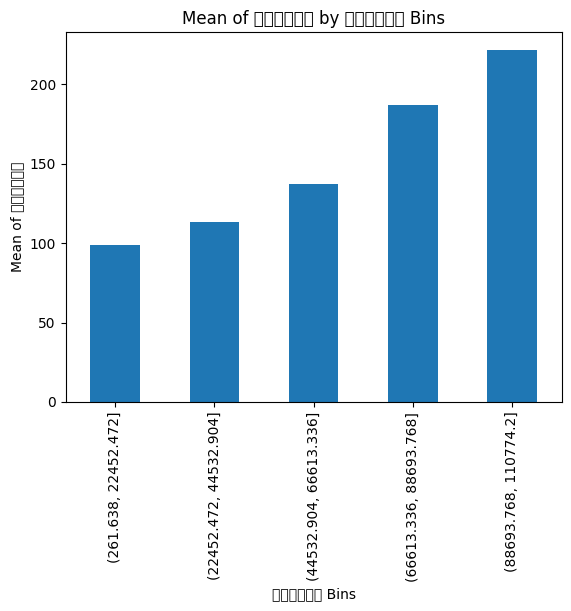

In [43]:
plot_mean_by_bins(train, '전력수요합계', '전력기상지수', bins=5)

### 전력부하량 평균

bins
(39.085, 153.088]     99.999776
(153.088, 266.523]    99.999082
(266.523, 379.959]    99.999381
(379.959, 493.395]    99.999086
(493.395, 606.831]    99.999215
Name: 전력기상지수, dtype: float64


C:\Users\m\AppData\Local\Temp\ipykernel_3760\1823313478.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins')[dependent_var].mean()
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_

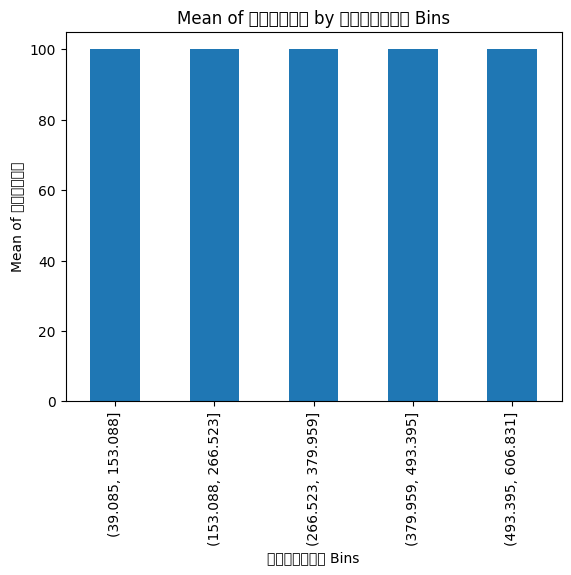

In [44]:
plot_mean_by_bins(train, '전력부하량평균', '전력기상지수', bins=5)

### 습도

bins
(2.603, 22.16]     97.522171
(22.16, 41.62]     97.713135
(41.62, 61.08]     97.909008
(61.08, 80.54]    101.028792
(80.54, 100.0]    100.977995
Name: 전력기상지수, dtype: float64


C:\Users\m\AppData\Local\Temp\ipykernel_3760\1823313478.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins')[dependent_var].mean()
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_

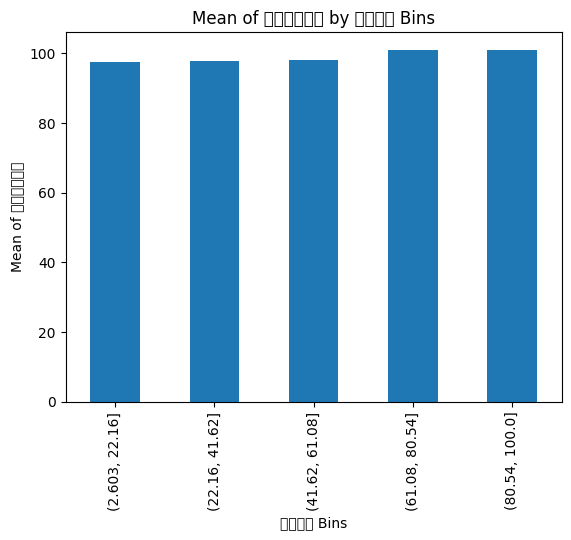

In [46]:
plot_mean_by_bins(train, '상대습도', '전력기상지수', bins=5)

### 풍속

bins
(-0.0274, 5.48]    100.015046
(5.48, 10.96]       99.513502
(10.96, 16.44]     104.073438
(16.44, 21.92]     113.982103
(21.92, 27.4]       97.700000
Name: 전력기상지수, dtype: float64


C:\Users\m\AppData\Local\Temp\ipykernel_3760\1823313478.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins')[dependent_var].mean()
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_

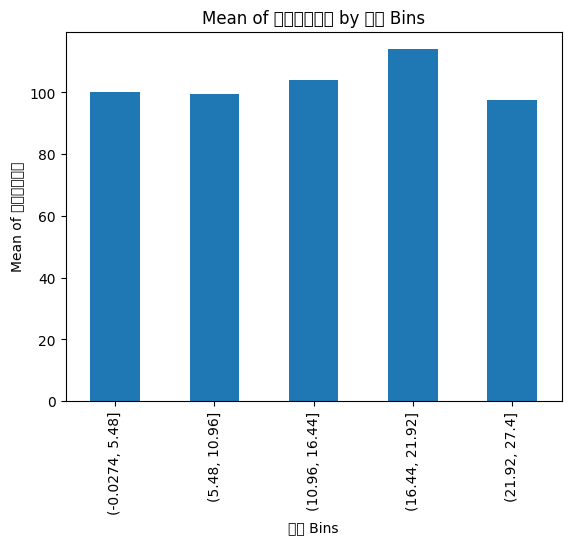

In [47]:
plot_mean_by_bins(train, '풍속', '전력기상지수', bins=5)

### 응애

C:\Users\m\AppData\Local\Temp\ipykernel_3760\3003951147.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature_means = train.groupby(f'{cont_feature}_cut')[cont_feature].mean()
C:\Users\m\AppData\Local\Temp\ipykernel_3760\3003951147.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_means = train.groupby(f'{cont_feature}_cut')['전력기상지수'].mean()
C:\Users\m\AppData\Local\Temp\ipykernel_3760\3003951147.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=cont_feature, y='전력기상지수', data=plot_data, palette='Set2', ax=ax)
C:\Users\m\AppData\Local\Temp\

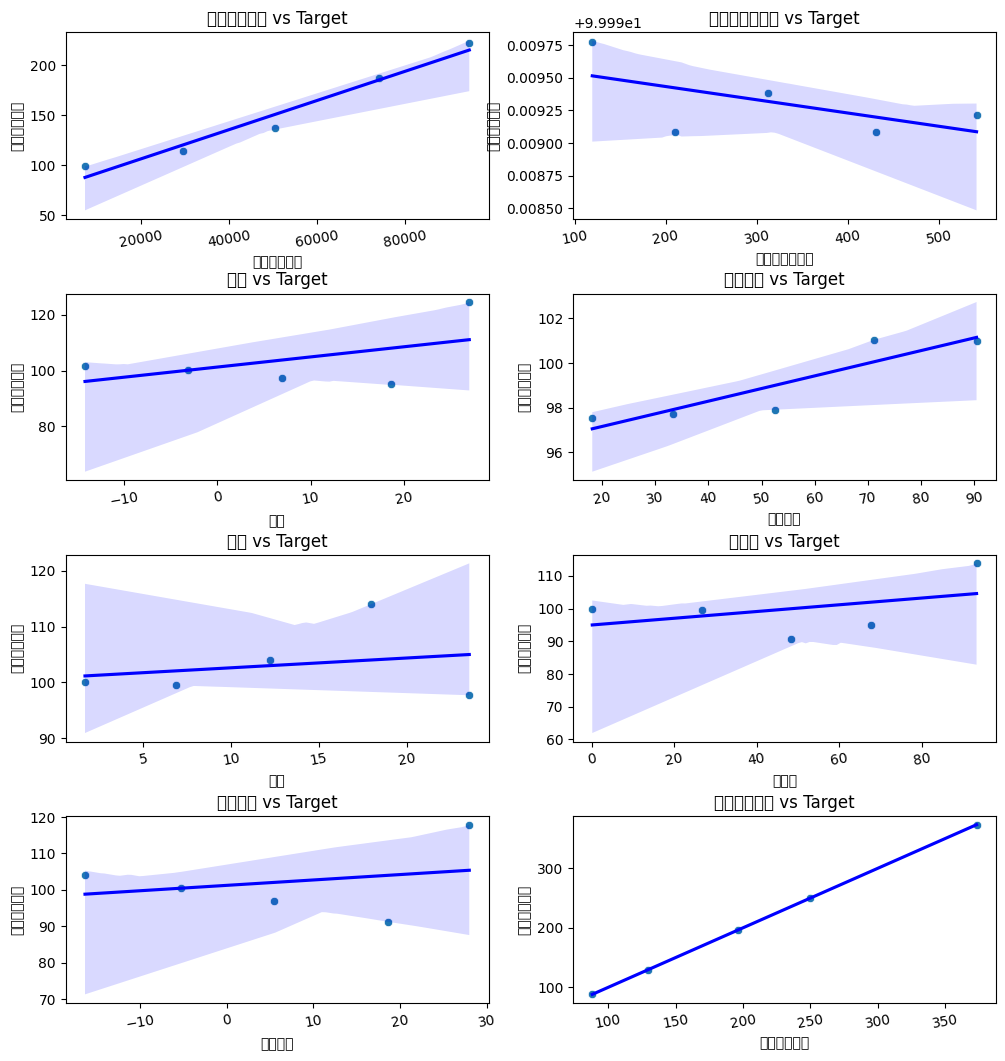

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 연속형 피처 리스트
cont_features = summary[summary['데이터 종류'] == '연속형'].index 

# Figure 및 GridSpec 설정
plt.figure(figsize=(12, 16))
grid = gridspec.GridSpec(5, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

# 연속형 변수 및 연속형 종속 변수 시각화
for idx, cont_feature in enumerate(cont_features):
    # 연속형 변수의 값들을 5개 구간으로 나누기
    train[f'{cont_feature}_cut'] = pd.cut(train[cont_feature], 5)
    
    # 각 구간의 평균 값을 계산
    feature_means = train.groupby(f'{cont_feature}_cut')[cont_feature].mean()
    target_means = train.groupby(f'{cont_feature}_cut')['전력기상지수'].mean()

    # 데이터 프레임으로 변환
    plot_data = pd.DataFrame({cont_feature: feature_means, '전력기상지수': target_means}).reset_index(drop=True)

    # subplot 설정
    ax = plt.subplot(grid[idx])
    sns.scatterplot(x=cont_feature, y='전력기상지수', data=plot_data, palette='Set2', ax=ax)
    sns.regplot(x=cont_feature, y='전력기상지수', data=plot_data, scatter=False, ax=ax, color='blue')
    ax.tick_params(axis='x', labelrotation=10)
    ax.set_title(f'{cont_feature} vs Target')

plt.show()


In [50]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index # 연속형 피처

In [54]:
train.describe()

,Unnamed: 0.1,Unnamed: 0,격자넘버,시간,공동주택수,지점번호,계약전력합계,전력부하량평균,기온,상대습도,풍속,강수량,체감온도,요일,주중주말,전력기상지수,년,월,일
count,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06,7.593181e+06
mean,3.796706e+06,3.796707e+06,1.542264e+04,1.150011e+01,4.189798e+01,4.977981e+02,6.243235e+04,2.445485e+02,1.411739e+01,6.997054e+01,1.914832e+00,1.157360e-01,1.375868e+01,3.001858e+00,2.855508e-01,9.999927e+01,2.020961e+03,6.521745e+00,1.573301e+01
std,2.192019e+06,2.192019e+06,3.312747e+03,6.922110e+00,4.242608e+01,2.564295e+02,5.673240e+04,9.149694e+01,8.940634e+00,2.053927e+01,1.689577e+00,9.988688e-01,1.143273e+01,1.997709e+00,4.516764e-01,2.511944e+01,8.084826e-01,3.449062e+00,8.801429e+00
min,0.000000e+00,1.000000e+00,4.821000e+03,0.000000e+00,1.000000e+01,9.800000e+01,5.475000e+03,3.965180e+01,-2.460000e+01,2.700000e+00,0.000000e+00,0.000000e+00,-2.670000e+01,0.000000e+00,0.000000e+00,4.890000e+01,2.020000e+03,1.000000e+00,1.000000e+00
25%,1.898344e+06,1.898345e+06,1.246900e+04,6.000000e+00,1.500000e+01,2.790000e+02,2.340000e+04,1.798686e+02,7.400000e+00,5.600000e+01,7.000000e-01,0.000000e+00,4.700000e+00,1.000000e+00,0.000000e+00,8.222000e+01,2.020000e+03,4.000000e+00,8.000000e+00
50%,3.796747e+06,3.796748e+06,1.616000e+04,1.200000e+01,2.600000e+01,4.930000e+02,4.290000e+04,2.329593e+02,1.480000e+01,7.290000e+01,1.500000e+00,0.000000e+00,1.480000e+01,3.000000e+00,0.000000e+00,9.570000e+01,2.021000e+03,7.000000e+00,1.600000e+01
75%,5.695052e+06,5.695053e+06,1.839200e+04,1.800000e+01,5.200000e+01,6.730000e+02,8.130000e+04,2.961240e+02,2.150000e+01,8.740000e+01,2.700000e+00,0.000000e+00,2.370000e+01,5.000000e+00,1.000000e+00,1.146400e+02,2.022000e+03,1.000000e+01,2.300000e+01
max,7.593354e+06,7.593355e+06,2.094700e+04,2.300000e+01,3.070000e+02,9.910000e+02,3.230780e+05,6.068307e+02,3.690000e+01,1.000000e+02,2.740000e+01,1.022000e+02,3.740000e+01,6.000000e+00,1.000000e+00,3.730600e+02,2.023000e+03,1.200000e+01,3.100000e+01


In [ ]:
# 전력기상지수를 150을 기준으로 0과 1로 나누는 새로운 열 추가
df['BinaryPowerWeatherIndex'] = (df['PowerWeatherIndex'] > 150).astype(int)

# 동해형식

In [10]:
# 전력기상지수를 150을 기준으로 0과 1로 나누는 새로운 열 추가
train['전력기상지수0'] = (train['전력기상지수'] > 150).astype(int)

In [11]:
train['전력기상지수0']

0          0
1          0
2          0
3          0
4          0
          ..
7593350    0
7593351    0
7593352    0
7593353    0
7593354    0
Name: 전력기상지수0, Length: 7593181, dtype: int32

In [12]:
# 타깃값이 1일때 고윳값의 비율을 확인하는 함수
def plot_target_ratio_by_features(df, features, num_rows, num_cols, size=(12,18)):
    mpl.rc('font', size=9)
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        sns.barplot(x='전력기상지수0', y=feature, data=train, hue=feature, palette='Set2', ax=ax, legend=False)

In [13]:
bin_feautres = summary[summary['데이터 종류'] == '연속형'].index
plot_target_ratio_by_features(train, bin_feautres, 6, 3)